<a href="https://colab.research.google.com/github/AnirbanMukherjeeXD/chatbot-using-seq2seq/blob/main/Chatbot_Seq2Seq_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

## Preparing Dataset

In [ ]:
dataframe=pd.read_csv('chatbotText.csv')
dataframe.head(3)

,Sl. No,Q,A
0,1,How are you?,"I am fine, thank you! How are you?"
1,2,Who are you?,I am a Chatbot to help you
2,3,What are your hobbies?,I like to play cricket


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [ ]:
# Splitting into inputs and outputs

X=dataframe['Q'].values
Y=dataframe['A'].values

### Tokenizing Encoder Input

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts( X ) 
tokenized_X = tokenizer.texts_to_sequences( X ) 

In [ ]:
length_list = list()
for token_seq in tokenized_X:
    length_list.append( len( token_seq ))

max_input_length = np.array( length_list ).max()
print( 'Question max length is : ',max_input_length)

padded_X = pad_sequences( tokenized_X , maxlen=max_input_length , padding='post' )
encoder_input_data = np.array( padded_X )
print( 'Encoder input data shape : ',encoder_input_data.shape )

X_dict = tokenizer.word_index
num_X_tokens = len( X_dict )+1
print( 'Number of Input tokens : ', num_X_tokens)

Question max length is :  4
Encoder input data shape :  (3, 4)
Number of Input tokens :  8


### Tokenizing Decoder Input

In [ ]:
new_Y=[]
for line in Y:
    new_Y.append( 'start ' + line + ' end' )

In [ ]:
new_Y[0]

'start I am fine, thank you! How are you? end'

In [ ]:
tokenizer = Tokenizer(filters='!"#$&*+-;<=>[\\]^_`{|}~\t\n',split=' ',lower=False)
#tokenizer = Tokenizer()
tokenizer.fit_on_texts(new_Y) 
tokenized_Y = tokenizer.texts_to_sequences(new_Y) 

In [ ]:
length_list = list()
for token_seq in tokenized_Y:
    length_list.append( len( token_seq ))

max_output_length = np.array( length_list ).max()
print( 'Answer max length is : ',max_output_length)

padded_Y = pad_sequences( tokenized_Y , maxlen=max_output_length , padding='post' )
decoder_input_data = np.array( padded_Y )
print( 'Decoder input data shape : ',decoder_input_data.shape )

Y_dict = tokenizer.word_index
num_Y_tokens = len( Y_dict )+1
print( 'Number of Output tokens : ', num_Y_tokens)

Answer max length is :  10
Decoder input data shape :  (3, 10)
Number of Output tokens :  18


### Tokenizing Decoder Output

In [ ]:
decoder_target_data = list()
for token_seq in tokenized_Y:
    decoder_target_data.append( token_seq[ 1 : ] ) 
    
padded_Y = pad_sequences( decoder_target_data , maxlen=max_output_length, padding='post' )
onehot_Y = to_categorical( padded_Y , num_Y_tokens )
decoder_target_data = np.array( onehot_Y )
print( 'Decoder target data shape : ', decoder_target_data.shape )

Decoder target data shape :  (3, 10, 18)


## Model

### Architecture

In [ ]:
import tensorflow
from tensorflow.keras.layers import Embedding, LSTM, Dense, GRU, Input
from tensorflow.keras.models import Sequential, Model

In [ ]:
# Encoder input

encoder_inputs = Input(shape=( None , ))
encoder_embedding = Embedding( num_X_tokens, 256 , mask_zero=True ) (encoder_inputs)
encoder_outputs , state_h , state_c = LSTM( 128 , return_state=True  )( encoder_embedding )
encoder_states = [ state_h , state_c ]

In [ ]:
# Decoder input

decoder_inputs = Input(shape=( None ,  ))
decoder_embedding = Embedding( num_Y_tokens, 256 , mask_zero=True) (decoder_inputs)
decoder_lstm = LSTM( 128 , return_state=True , return_sequences=True)


In [ ]:
# Decoder output

decoder_outputs , _ , _ = decoder_lstm ( decoder_embedding , initial_state=encoder_states )
decoder_dense = Dense( num_Y_tokens , activation='softmax') 
output = decoder_dense ( decoder_outputs )

In [ ]:
model = Model([encoder_inputs, decoder_inputs], output )
model.compile(optimizer='adam', loss='categorical_crossentropy')

model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None)]       0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, None)]       0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, None, 256)    2048        input_1[0][0]                    
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, None, 256)    4608        input_2[0][0]                    
______________________________________________________________________________________________

### Train

In [ ]:
history=model.fit([encoder_input_data , decoder_input_data], decoder_target_data, epochs=500 ) 

Epoch 1/500
1/1 [==============================] - 37s 37s/step - loss: 2.5055
Epoch 2/500
1/1 [==============================] - 0s 11ms/step - loss: 2.4910
Epoch 3/500
1/1 [==============================] - 0s 11ms/step - loss: 2.4762
Epoch 4/500
1/1 [==============================] - 0s 11ms/step - loss: 2.4608
Epoch 5/500
1/1 [==============================] - 0s 12ms/step - loss: 2.4445
Epoch 6/500
1/1 [==============================] - 0s 10ms/step - loss: 2.4268
Epoch 7/500
1/1 [==============================] - 0s 12ms/step - loss: 2.4074
Epoch 8/500
1/1 [==============================] - 0s 11ms/step - loss: 2.3856
Epoch 9/500
1/1 [==============================] - 0s 11ms/step - loss: 2.3608
Epoch 10/500
1/1 [==============================] - 0s 11ms/step - loss: 2.3323
Epoch 11/500
1/1 [==============================] - 0s 11ms/step - loss: 2.2990
Epoch 12/500
1/1 [==============================] - 0s 11ms/step - loss: 2.2600
Epoch 13/500
1/1 [==============================]

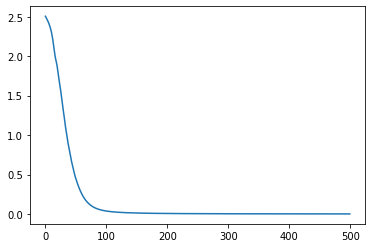

In [ ]:
plt.plot(history.history['loss'])

## Inference

In [ ]:
import re

In [ ]:
def make_inference_models():
    encoder_model = Model(encoder_inputs, encoder_states)
    decoder_state_input_h = Input(shape=( 128 ,))
    decoder_state_input_c = Input(shape=( 128 ,))
    decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]
    decoder_outputs, state_h, state_c = decoder_lstm(decoder_embedding , initial_state=decoder_states_inputs)
    decoder_states = [state_h, state_c]
    decoder_outputs = decoder_dense(decoder_outputs)
    decoder_model = Model([decoder_inputs] + decoder_states_inputs,[decoder_outputs] + decoder_states)
    return encoder_model , decoder_model

In [ ]:
def str_to_tokens( sentence : str ):
    words = sentence.split()
    tokens_list = list()
    for word in words:
        tokens_list.append( X_dict[ word ] ) 
    return pad_sequences( [tokens_list] , maxlen=max_input_length , padding='post')

In [ ]:
enc_model , dec_model = make_inference_models()

## Model Plots

Seq2Seq Model


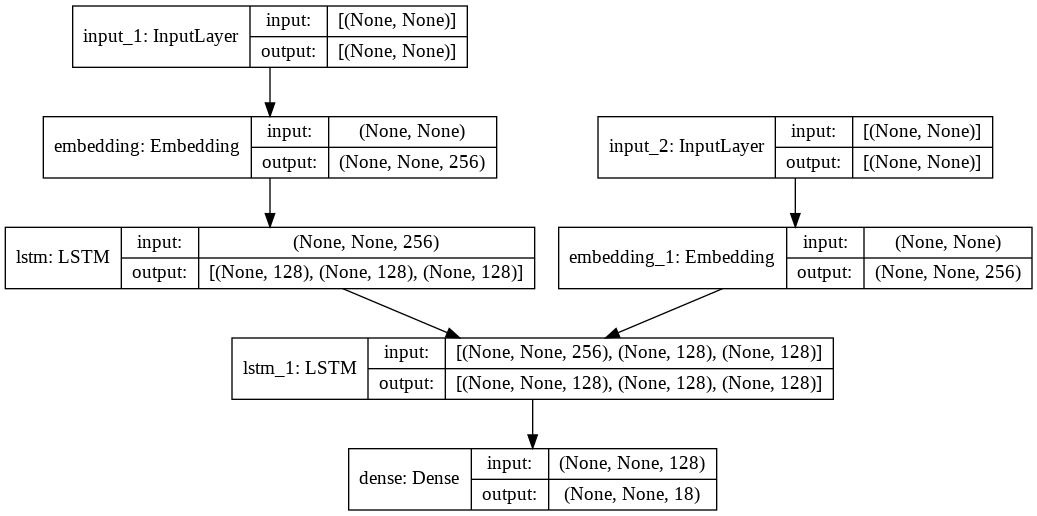

In [ ]:
from tensorflow.keras.utils import plot_model
print("Seq2Seq Model")
plot_model(model, show_shapes=True,show_layer_names=True)

Encoder model


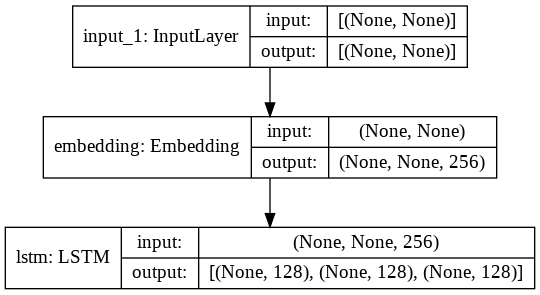

In [ ]:
print("Encoder model")
plot_model(enc_model, show_shapes=True,show_layer_names=True)

Decoder model


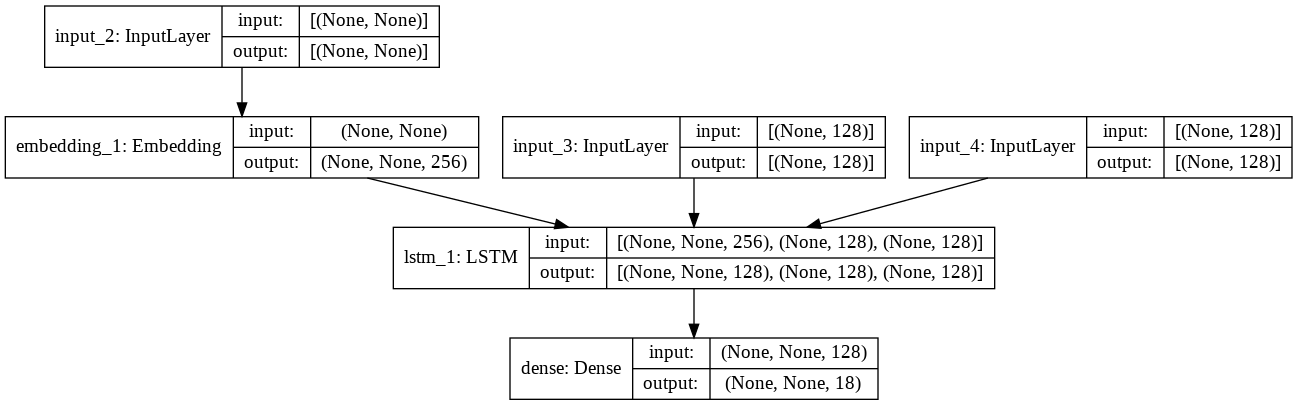

In [ ]:
print("Decoder model")
plot_model(dec_model, show_shapes=True,show_layer_names=True)

## RUN CHATBOT

This is the main chatbot. To start communicating run the code cell below. Type the question and press enter to get the answer.

To exit type 'Bye'.

In [ ]:
while(1):
    inp_quest=input( 'Enter question : ' )
    if(inp_quest.lower()=='bye'):
      break
    inp_quest=re.sub(r"[?,/.!@%$#]", " ", inp_quest)
    try:
      states_values = enc_model.predict( str_to_tokens( inp_quest.lower()) )
      empty_target_seq = np.zeros( ( 1 , 1 ) )
      empty_target_seq[0, 0] = Y_dict['start']
      stop_condition = False
      decoded_answer = ''

      while not stop_condition :
          dec_outputs , h , c = dec_model.predict([ empty_target_seq ] + states_values )
          sampled_word_index = np.argmax( dec_outputs[0, -1, :] )
          sampled_word = None
          for word , index in Y_dict.items() :
              if sampled_word_index == index :
                  if (word!='end'):
                    decoded_answer += ' {}'.format( word )
                  sampled_word = word
          
          if sampled_word == 'end' or len(decoded_answer.split()) > max_output_length:
              stop_condition = True
              
          empty_target_seq = np.zeros( ( 1 , 1 ) )  
          empty_target_seq[ 0 , 0 ] = sampled_word_index
          states_values = [ h , c ] 

      print( decoded_answer )
    except:
      print("Sorry, didn't get your question")
      
print("Thank you for talking. Goodbye!")

Enter question : Who are you
 I am a Chatbot to help you
Enter question : bye
Thank you for talking. Goodbye!
